# dans ce teste que j'ai fait c'est basé sur SMOTE pour équilibrer mes donner (pas de stop word ou aucun pretraitement)


Colonnes disponibles : Index(['Unnamed: 0', 'tweet_id', 'text', 'science_related', 'scientific_claim',
       'scientific_reference', 'scientific_context'],
      dtype='object')

Nombre d'exemples par classe :
science_related         375.0
scientific_claim        263.0
scientific_reference    203.0
scientific_context      251.0
dtype: float64


/tmp/ipykernel_32229/4163845326.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


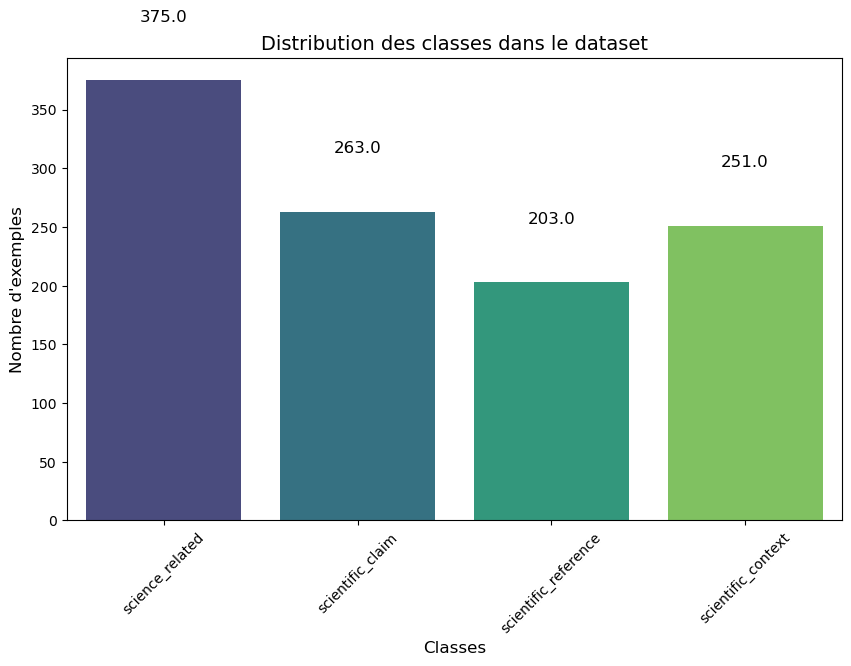

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier TSV
file_path = "scitweets_export.tsv"
df = pd.read_csv(file_path, sep='\t')

# Afficher les colonnes disponibles
print("\nColonnes disponibles :", df.columns)

# Vérifier que les colonnes des classes existent bien
class_columns = ['science_related', 'scientific_claim', 'scientific_reference', 'scientific_context']
for col in class_columns:
    if col not in df.columns:
        print(f"⚠️ Colonne '{col}' absente du dataset !")
        class_columns.remove(col)

# Vérifier la distribution des classes
class_counts = df[class_columns].sum()  # Somme des 1 pour chaque classe

print("\nNombre d'exemples par classe :")
print(class_counts)

# Créer un histogramme unique
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Ajouter les valeurs sur chaque barre
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 50, str(v), ha='center', fontsize=12)

plt.xticks(rotation=45)
plt.title("Distribution des classes dans le dataset", fontsize=14)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Nombre d'exemples", fontsize=12)
plt.show()



Colonnes disponibles : Index(['Unnamed: 0', 'tweet_id', 'text', 'science_related', 'scientific_claim',
       'scientific_reference', 'scientific_context'],
      dtype='object')

Nombre d'exemples par classe :
science_related         375.0
scientific_claim        263.0
scientific_reference    203.0
scientific_context      251.0
non_scientific          765.0
dtype: float64


/tmp/ipykernel_32229/3628158383.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


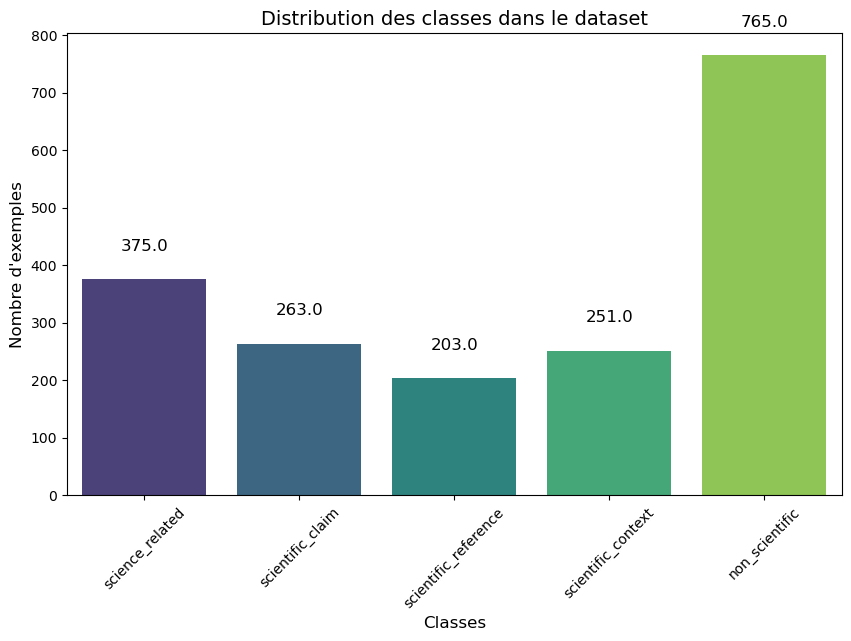

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier TSV
file_path = "scitweets_export.tsv"
df = pd.read_csv(file_path, sep='\t')

# Afficher les colonnes disponibles
print("\nColonnes disponibles :", df.columns)

# Vérifier que les colonnes des classes existent bien
class_columns = ['science_related', 'scientific_claim', 'scientific_reference', 'scientific_context']
for col in class_columns:
    if col not in df.columns:
        print(f"⚠️ Colonne '{col}' absente du dataset !")
        class_columns.remove(col)

# Calculer le nombre d'échantillons par classe
class_counts = df[class_columns].sum()  # Nombre de tweets par classe scientifique

# Ajouter la catégorie "Non-Scientifique"
df["non_scientific"] = (df[class_columns].sum(axis=1) == 0).astype(int)  # 1 si aucune classe scientifique n'est activée
class_counts["non_scientific"] = df["non_scientific"].sum()

# Afficher les résultats
print("\nNombre d'exemples par classe :")
print(class_counts)

# Créer un histogramme unique avec toutes les classes
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Ajouter les valeurs sur chaque barre
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 50, str(v), ha='center', fontsize=12)

plt.xticks(rotation=45)
plt.title("Distribution des classes dans le dataset", fontsize=14)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Nombre d'exemples", fontsize=12)
plt.show()


In [18]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Charger les données
file_path = "scitweets_export.tsv"
df = pd.read_csv(file_path, sep='\t')

# Définir les colonnes contenant les labels binaires
class_columns = ['science_related', 'scientific_claim', 'scientific_reference', 'scientific_context']
df["non_scientific"] = (df[class_columns].sum(axis=1) == 0).astype(int)  # Tweets sans label scientifique

# Sélectionner le texte et la classe cible
X = df["text"]  # Colonne contenant les tweets
y = df["science_related"]  # Exemple : on équilibre cette classe

# Transformer le texte en vecteurs TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limite à 5000 mots les plus importants
X_tfidf = vectorizer.fit_transform(X)

# Appliquer SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Vérifier la distribution après SMOTE
print("\nDistribution après SMOTE :")
print(pd.Series(y_resampled).value_counts())




Distribution après SMOTE :
science_related
0    765
1    765
Name: count, dtype: int64


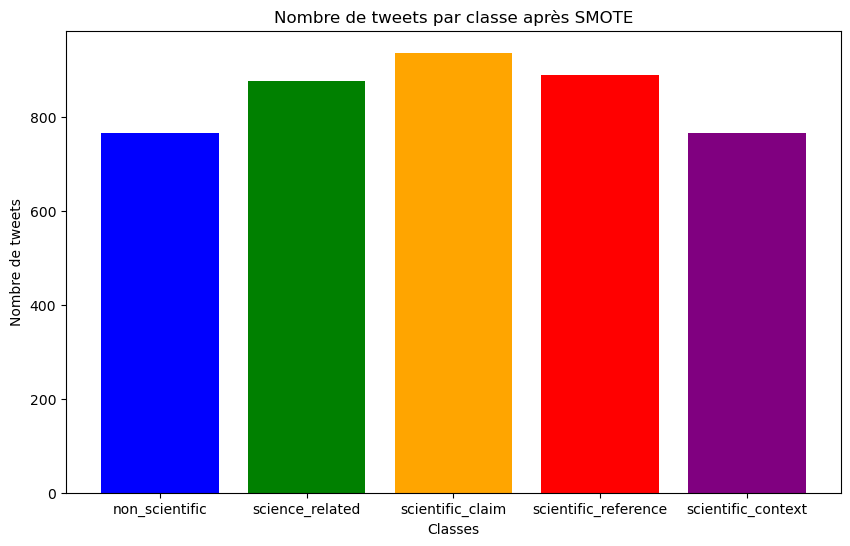

In [20]:
import matplotlib.pyplot as plt

# Compter le nombre d'exemples pour chaque classe après SMOTE
class_labels = ['non_scientific', 'science_related', 'scientific_claim', 'scientific_reference', 'scientific_context']
class_counts = {
    'non_scientific': pd.Series(y_resampled_all_classes[0]).value_counts().get(1, 0),
    'science_related': pd.Series(y_resampled_all_classes[1]).value_counts().get(1, 0),
    'scientific_claim': pd.Series(y_resampled_all_classes[2]).value_counts().get(1, 0),
    'scientific_reference': pd.Series(y_resampled_all_classes[3]).value_counts().get(1, 0),
    'scientific_context': pd.Series(y_resampled_all_classes[4]).value_counts().get(1, 0)
}

# Créer un histogramme
plt.figure(figsize=(10,6))
plt.bar(class_counts.keys(), class_counts.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Nombre de tweets par classe après SMOTE')
plt.xlabel('Classes')
plt.ylabel('Nombre de tweets')
plt.show()


In [21]:
# Convertir les données rééchantillonnées en DataFrame
X_resampled_df = pd.DataFrame(X_resampled.toarray(), columns=vectorizer.get_feature_names_out())

# Ajouter la colonne cible à la DataFrame
X_resampled_df['science_related'] = y_resampled

# Sauvegarder le DataFrame dans un fichier TSV
output_file_path = "scitweets_resampled.tsv"
X_resampled_df.to_csv(output_file_path, sep='\t', index=False)

print(f"Les données rééchantillonnées ont été sauvegardées dans : {output_file_path}")


Les données rééchantillonnées ont été sauvegardées dans : scitweets_resampled.tsv


In [4]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

[nltk_data] Downloading package stopwords to /home/tiziri-
[nltk_data]     tamani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/tiziri-
[nltk_data]     tamani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tiziri-
[nltk_data]     tamani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Classification Report for Binary Model (Science Related vs Non-Science):
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       147
           1       0.93      0.87      0.90       159

    accuracy                           0.90       306
   macro avg       0.90      0.90      0.90       306
weighted avg       0.90      0.90      0.90       306



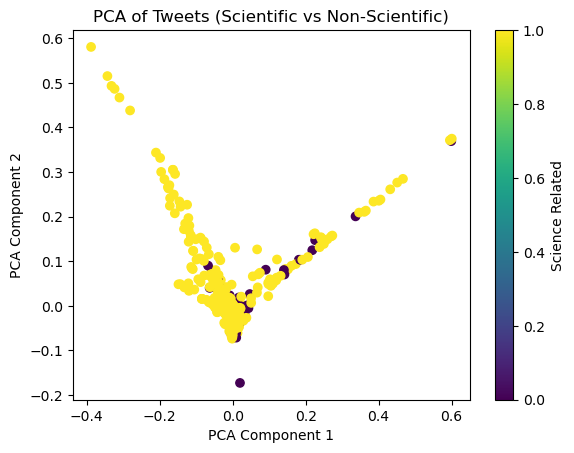

In [38]:
# Importations nécessaires
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Téléchargement des ressources NLTK
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Chargement des données depuis un fichier TSV
file_path = 'scitweets_export.tsv'  # Remplacez par le chemin de votre fichier
df = pd.read_csv(file_path, sep='\t')

# Prétraitement du texte
stop_words = set(stopwords.words('english'))
custom_stop_words = {"http", "https", "rt", "co", "amp", "via"}
negations = {"not", "no", "nor", "neither", "never", "none"}
stop_words = stop_words - negations
stop_words.update(custom_stop_words)

lemmatizer = WordNetLemmatizer()

def preprocess_tweet(tweet):
    # Supprimer les URLs
    #tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet, flags=re.MULTILINE)
    # Supprimer les mentions (@) et les caractères spéciaux
    tweet = re.sub(r"@\w+|\W", " ", tweet)
    # Convertir en minuscules
    tweet = tweet.lower()
    # Tokenization
    tokens = word_tokenize(tweet)
    # Gestion des négations
    tokens = [tokens[i] + "_" + tokens[i+1] if tokens[i] in negations else tokens[i] 
              for i in range(len(tokens)-1)]
    # Suppression des stop words et lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_tweet)

# Équilibrage des données avec SMOTE
X = df['cleaned_text']
y_binary = df['science_related']

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=100000)
X_vec = vectorizer.fit_transform(X)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_vec, y_binary)

# Séparation en train et test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Entraînement du modèle binaire
binary_model = LogisticRegression()
binary_model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred_binary = binary_model.predict(X_test)
print("Classification Report for Binary Model (Science Related vs Non-Science):")
print(classification_report(y_test, y_pred_binary))


# Visualisation des données avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_res.toarray())

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Tweets (Scientific vs Non-Scientific)')
plt.colorbar(label='Science Related')
plt.show()

In [2]:
# Entraîner un modèle pour chaque sous-classe
for subclass in ['scientific_claim', 'scientific_reference', 'scientific_context']:
    print(f"Training model for {subclass}...")
    
    # Séparer les features et la cible
    y_subclass = scientific_tweets[subclass]
    
    # Vectorisation du texte
    X_sci_vec = vectorizer.transform(scientific_tweets['cleaned_text'])
    
    # Séparation en train et test sets
    X_train_sci, X_test_sci, y_train_sci, y_test_sci = train_test_split(X_sci_vec, y_subclass, test_size=0.2, random_state=42)
    
    # Entraînement du modèle binaire
    subclass_model = LogisticRegression()
    subclass_model.fit(X_train_sci, y_train_sci)
    
    # Prédiction et évaluation
    y_pred_subclass = subclass_model.predict(X_test_sci)
    print(f"Classification Report for {subclass}:")
    print(classification_report(y_test_sci, y_pred_subclass))

Training model for scientific_claim...


NameError: name 'scientific_tweets' is not defined

In [3]:
# Visualisation des données avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_res.toarray())

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Tweets (Scientific vs Non-Scientific)')
plt.colorbar(label='Science Related')
plt.show()

NameError: name 'PCA' is not defined

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import numpy as np

# Réduire les dimensions à 3 composantes principales avec PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_res.toarray())

# Créer une figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Définir des couleurs pour chaque classe
colors = ['red', 'blue', 'green', 'purple']  # Une couleur par classe
class_labels = np.unique(y_res)  # Obtenir les étiquettes uniques des classes

# Afficher les points pour chaque classe
for i, class_label in enumerate(class_labels):
    ax.scatter(
        X_pca[y_res == class_label, 0],  # Composante 1
        X_pca[y_res == class_label, 1],  # Composante 2
        X_pca[y_res == class_label, 2],  # Composante 3
        c=colors[i],                     # Couleur de la classe
        label=f'Class {class_label}',    # Étiquette de la classe
        s=50,                            # Taille des points
        alpha=0.7                        # Transparence
    )

# Ajouter des labels et un titre
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D PCA Visualization of Tweets (Scientific vs Non-Scientific)')

# Ajouter une légende
ax.legend()

# Afficher le graphique
plt.show()

NameError: name 'X_res' is not defined

In [2]:
from transformers import pipeline

# Charger le modèle de paraphrase
paraphrase_model = pipeline("text2text-generation", model="t5-small")

# Exemple de tweet
tweet = "Science is constantly evolving, and new discoveries shape our understanding."

# Générer une paraphrase
paraphrased = paraphrase_model(f"paraphrase: {tweet}", max_length=100, num_return_sequences=1)
print(paraphrased[0]["generated_text"])


Device set to use cuda:0


Paraphrase: Science is constantly evolving, and new discoveries shape our understanding.
